<a href="https://colab.research.google.com/github/HabibRobbani/S2/blob/master/Full_Code_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


AWAL

In [0]:
batch_size = 128 #Jumlah Training
num_classes = 10
epochs = 100

img_rows, img_cols = 28, 28
(x_train, y_train), (x_test, y_test) = mnist.load_data() #ini ngeload data su

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
#for i in range (0, 10):
 # plt.imshow(x_train[i],'gray')
  #plt.show()

In [0]:

#preprocessing data sebelum masuk model
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols,1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
print(np.shape(x_train))  #data train 60000/data test 10000

(60000, 28, 28, 1)


In [0]:
#normalisai data (menyekalakan data)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /=255
x_test /=255
print('x_train shape:', x_train.shape)
print (x_train.shape[0], ' train samples')
print (x_test.shape[0], 'test sample')

x_train shape: (60000, 28, 28, 1)
60000  train samples
10000 test sample


In [0]:
#standararisai label
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0,25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0,5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)          

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

In [0]:
model.fit(x_train, y_train, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/100





60000/60000 [==============================] - 17s 289us/step - loss: 0.1929 - acc: 0.9405 - val_loss: 0.0529 - val_acc: 0.9835
Epoch 2/100
60000/60000 [==============================] - 3s 55us/step - loss: 0.0446 - acc: 0.9866 - val_loss: 0.0381 - val_acc: 0.9881
Epoch 3/100
60000/60000 [==============================] - 3s 55us/step - loss: 0.0279 - acc: 0.9917 - val_loss: 0.0290 - val_acc: 0.9898
Epoch 4/100
60000/60000 [==============================] - 3s 55us/step - loss: 0.0192 - acc: 0.9940 - val_loss: 0.0311 - val_acc: 0.9893
Epoch 5/100
60000/60000 [==============================] - 3s 56us/step - loss: 0.0132 - acc: 0.9960 - val_loss: 0.0354 - val_acc: 0.9886
Epoch 6/100
60000/60000 [==============================] - 3s 54us/step - loss: 0.0087 - acc: 0.9974 - val_loss: 0.0321 - val_acc: 0.9905
Epoch 7/100
60000/

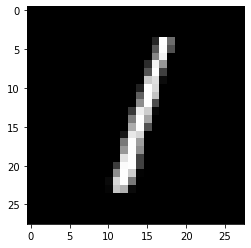

prediksi:1
[[7.1599828e-19 1.0000000e+00 5.5466509e-18 1.6965400e-23 2.1328969e-14
  5.2279072e-22 4.5413462e-19 1.3525484e-15 9.5483847e-12 6.9415100e-22]]
prediksi:3
[[7.1599828e-19 1.0000000e+00 5.5466509e-18 1.6965400e-23 2.1328969e-14
  5.2279072e-22 4.5413462e-19 1.3525484e-15 9.5483847e-12 6.9415100e-22]]


In [0]:
data_ke=2

image_test = x_test[data_ke]
image_test = image_test.reshape(28,28)
plt.imshow(image_test,'gray')
plt.show()

image_test = image_test.reshape(1,28,28,1)
prediksi = model.predict(image_test)
print('prediksi:'+str(np.argmax(prediksi)))
print(prediksi)